In [1]:
import os
from typing import Tuple
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.io.image import read_image
from torchvision.transforms import v2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from torch import nn
from data.coco_dataset import COCODataset, USED_CATEGORIES

In [6]:
ds = COCODataset("./datasets/COCO2014", 512, 512, sup_cats=USED_CATEGORIES)
len(ds)

loading annotations into memory...
Done (t=3.50s)
creating index...
index created!


36391

In [4]:
from data.outlier_injection import OutlierInjection

In [12]:
oi = OutlierInjection(1, False, 0)

In [7]:
images = [ds[i] for i in range(5)]

In [8]:
outlier = torch.stack([im[0] for im in images])
mask = torch.stack([im[1] for im in images])
img = torch.randint(0, 255, (5, 3, 512, 512))
label = torch.randint(0, 10, (5, 512, 512))

In [13]:
image_with_outlier, label = oi(img, label, outlier, mask)

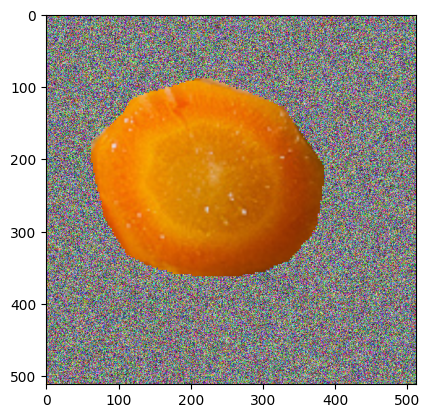

In [14]:
plt.imshow(image_with_outlier[1].permute(1, 2, 0))